In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2018-01-04"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2018_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-01-04,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7021,사하구,8175,사하구,1154,16.44%,"7,598"
1,2018-01-04,간장,오복왕표 0.9ℓ 1병,6390,사하구,6677,사하구,287,4.49%,"6,534"
2,2018-01-04,달걀,오경슈퍼란60g정도 10개,2780,사하구,2990,사하구,210,7.55%,"2,885"
3,2018-01-04,닭고기,육계 1.0㎏,5909,사하구,5990,사하구,81,1.37%,"5,950"
4,2018-01-04,대파,1.0㎏,3257,사하구,3750,사하구,493,15.14%,"3,504"
5,2018-01-04,돼지고기,삼겹살 500g,8950,사하구,9450,사하구,500,5.59%,"9,200"
6,2018-01-04,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
7,2018-01-04,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
8,2018-01-04,맥주,하이트 500㎖ 1병,1420,사하구,1460,사하구,40,2.82%,"1,440"
9,2018-01-04,무,2.0㎏ 1개,1150,사하구,1280,사하구,130,11.3%,"1,215"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2018-04-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2018_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-04-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,사하구,7490,사하구,815,12.21%,"7,083"
1,2018-04-05,간장,오복왕표 0.9ℓ 1병,6390,사하구,6677,사하구,287,4.49%,"6,534"
2,2018-04-05,고등어,30㎝정도 500g 1마리,2714,사하구,4750,사하구,2036,75.02%,"3,732"
3,2018-04-05,달걀,오경슈퍼란60g정도 10개,2180,사하구,2590,사하구,410,18.81%,"2,385"
4,2018-04-05,닭고기,육계 1.0㎏,5909,사하구,6990,사하구,1081,18.29%,"6,450"
5,2018-04-05,대파,1.0㎏,2763,사하구,3000,사하구,237,8.58%,"2,882"
6,2018-04-05,돼지고기,삼겹살 500g,9250,사하구,9950,사하구,700,7.57%,"9,600"
7,2018-04-05,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
8,2018-04-05,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
9,2018-04-05,맥주,하이트 500㎖ 1병,1420,사하구,1460,사하구,40,2.82%,"1,440"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2018-07-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2018_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-07-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7959,사하구,8175,사하구,216,2.71%,"8,067"
1,2018-07-05,간장,오복왕표 0.9ℓ 1병,6390,사하구,6677,사하구,287,4.49%,"6,534"
2,2018-07-05,달걀,오경슈퍼란60g정도 10개,2380,사하구,2590,사하구,210,8.82%,"2,485"
3,2018-07-05,닭고기,육계 1.0㎏,5909,사하구,5990,사하구,81,1.37%,"5,950"
4,2018-07-05,대파,1.0㎏,3597,사하구,3685,사하구,88,2.45%,"3,641"
5,2018-07-05,돼지고기,삼겹살 500g,9950,사하구,9950,사하구,0,0.0%,"9,950"
6,2018-07-05,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
7,2018-07-05,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
8,2018-07-05,맥주,하이트 500㎖ 1병,1420,사하구,1460,사하구,40,2.82%,"1,440"
9,2018-07-05,무,2.0㎏ 1개,1980,사하구,1990,사하구,10,0.51%,"1,985"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2018-10-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2018_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2018-10-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사하구,7959,사하구,534,7.19%,"7,692"
1,2018-10-11,간장,오복왕표 0.9ℓ 1병,6390,사하구,6677,사하구,287,4.49%,"6,534"
2,2018-10-11,고등어,30㎝정도 500g 1마리,2444,사하구,3700,사하구,1256,51.39%,"3,072"
3,2018-10-11,달걀,오경슈퍼란60g정도 10개,2380,사하구,2990,사하구,610,25.63%,"2,685"
4,2018-10-11,닭고기,육계 1.0㎏,6272,사하구,6590,사하구,318,5.07%,"6,431"
5,2018-10-11,대파,1.0㎏,4569,사하구,7160,사하구,2591,56.71%,"5,865"
6,2018-10-11,돼지고기,삼겹살 500g,9950,사하구,9950,사하구,0,0.0%,"9,950"
7,2018-10-11,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
8,2018-10-11,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
9,2018-10-11,맥주,하이트 500㎖ 1병,1420,사하구,1460,사하구,40,2.82%,"1,440"


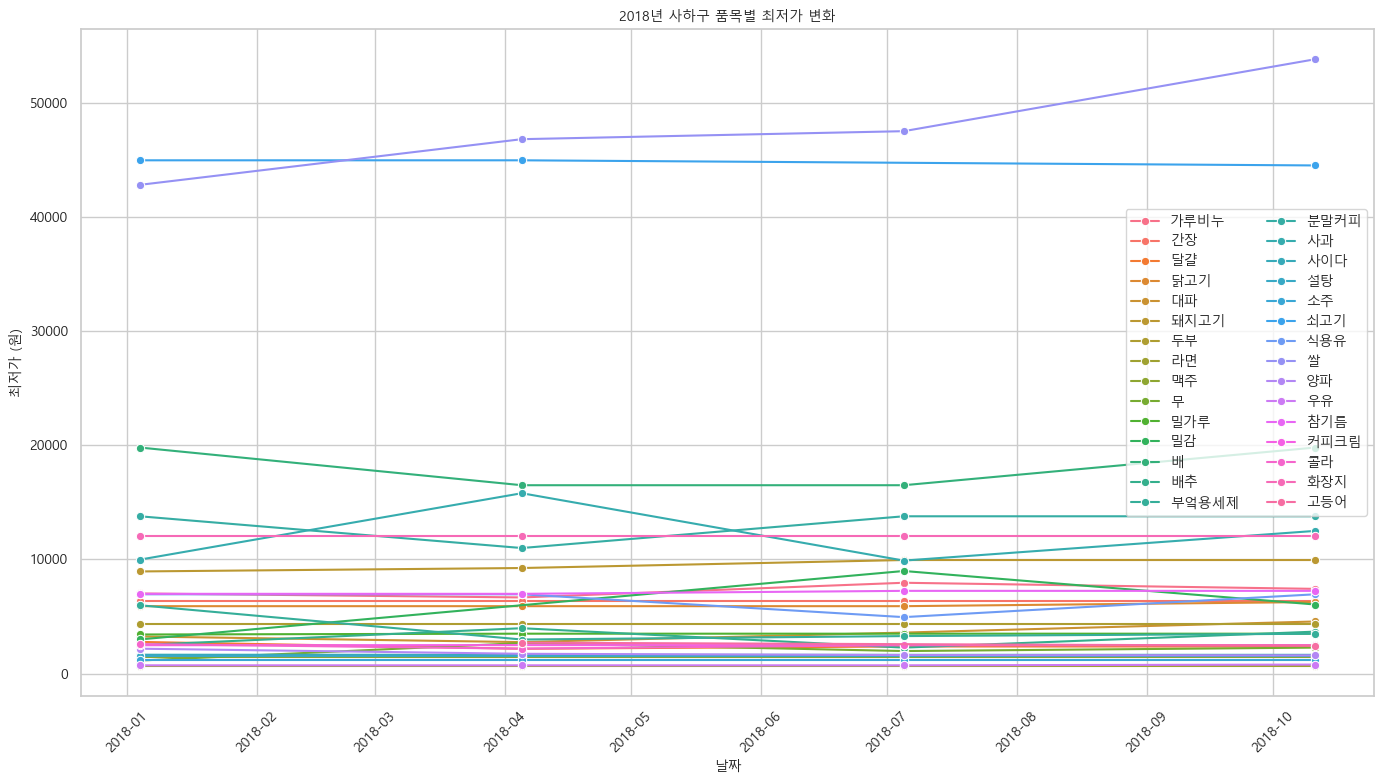

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2018_1q.csv")
q2 = pd.read_csv("사하구2018_2q.csv")
q3 = pd.read_csv("사하구2018_3q.csv")
q4 = pd.read_csv("사하구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 사하구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사하구2018_min.csv", index=False, encoding="utf-8-sig")

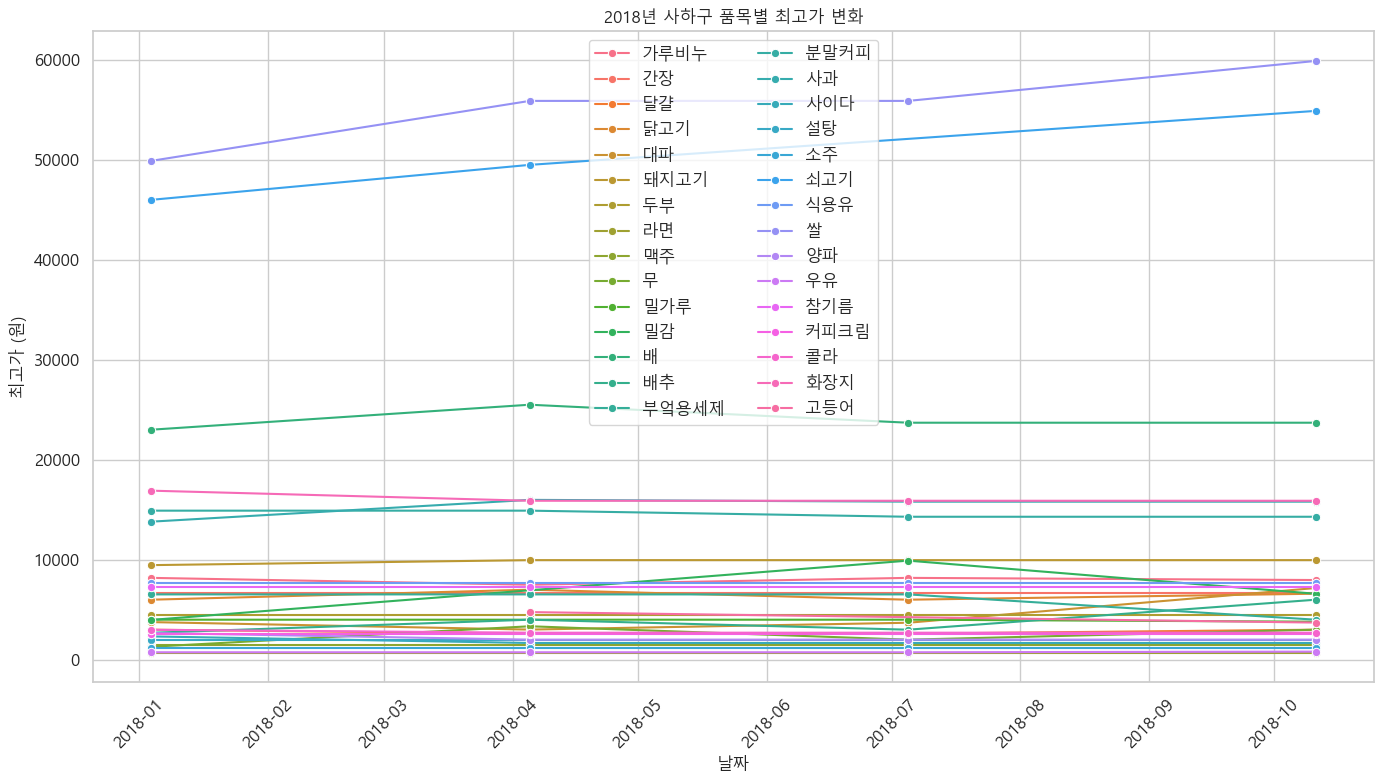

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2018_1q.csv")
q2 = pd.read_csv("사하구2018_2q.csv")
q3 = pd.read_csv("사하구2018_3q.csv")
q4 = pd.read_csv("사하구2018_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2018년 사하구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사하구2018_max.csv", index=False, encoding="utf-8-sig")